In [1]:
from scipy.io import loadmat

In [2]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib import gridspec

In [77]:
plt.style.use('seaborn-white')

In [3]:
data_odor = loadmat('/Users/linggeli/neuroscience/data/SuperChris/super_chris_extraction_odor2s.mat')
data_poke = loadmat('/Users/linggeli/neuroscience/data/SuperChris/super_chris_extraction_pokein2s.mat')

In [4]:
data_odor.keys()

['unitEpoch',
 'unitIDs',
 'trialTimeBins',
 'lfpEpoch',
 '__header__',
 '__globals__',
 'eventTimeBins',
 'trialInfo',
 'lfpIDs',
 '__version__']

In [10]:
data_odor['unitIDs']

array([[array([u'T1-U1'], dtype='<U5'), array([u'T1-U2'], dtype='<U5'),
        array([u'T1-U3'], dtype='<U5'), array([u'T12-U1'], dtype='<U6'),
        array([u'T13-U1'], dtype='<U6'), array([u'T13-U2'], dtype='<U6'),
        array([u'T13-U3'], dtype='<U6'), array([u'T13-U4'], dtype='<U6'),
        array([u'T13-U5'], dtype='<U6'), array([u'T13-U6'], dtype='<U6'),
        array([u'T13-U7'], dtype='<U6'), array([u'T13-U8'], dtype='<U6'),
        array([u'T14-U1'], dtype='<U6'), array([u'T14-U2'], dtype='<U6'),
        array([u'T14-U3'], dtype='<U6'), array([u'T14-U4'], dtype='<U6'),
        array([u'T15-U1'], dtype='<U6'), array([u'T15-U2'], dtype='<U6'),
        array([u'T15-U3'], dtype='<U6'), array([u'T15-U4'], dtype='<U6'),
        array([u'T15-U5'], dtype='<U6'), array([u'T15-U6'], dtype='<U6'),
        array([u'T16-U1'], dtype='<U6'), array([u'T19-U1'], dtype='<U6'),
        array([u'T19-U2'], dtype='<U6'), array([u'T19-U3'], dtype='<U6'),
        array([u'T19-U4'], dtype='<U6'), 

In [9]:
data_odor['lfpIDs']

array([[array([u'T1_LFP_Raw'], dtype='<U10'),
        array([u'T10_LFP_Raw'], dtype='<U11'),
        array([u'T12_LFP_Raw'], dtype='<U11'),
        array([u'T13_LFP_Raw'], dtype='<U11'),
        array([u'T14_LFP_Raw'], dtype='<U11'),
        array([u'T15_LFP_Raw'], dtype='<U11'),
        array([u'T16_LFP_Raw'], dtype='<U11'),
        array([u'T18_LFP_Raw'], dtype='<U11'),
        array([u'T19_LFP_Raw'], dtype='<U11'),
        array([u'T2_LFP_Raw'], dtype='<U10'),
        array([u'T20_LFP_Raw'], dtype='<U11'),
        array([u'T21_LFP_Raw'], dtype='<U11'),
        array([u'T22_LFP_Raw'], dtype='<U11'),
        array([u'T23_LFP_Raw'], dtype='<U11'),
        array([u'T3_LFP_Raw'], dtype='<U10'),
        array([u'T4_LFP_Raw'], dtype='<U10'),
        array([u'T5_LFP_Raw'], dtype='<U10'),
        array([u'T6_LFP_Raw'], dtype='<U10'),
        array([u'T7_LFP_Raw'], dtype='<U10'),
        array([u'T8_LFP_Raw'], dtype='<U10'),
        array([u'T9_LFP_Raw'], dtype='<U10')]], dtype=object)

In [5]:
data_odor['unitEpoch'].shape

(245, 4001, 46)

In [6]:
data_odor['lfpEpoch'].shape

(245, 4001, 21)

In [7]:
print(data_odor['eventTimeBins'])

[[-2.   ]
 [-1.999]
 [-1.998]
 ...
 [ 1.998]
 [ 1.999]
 [ 2.   ]]


In [24]:
data_odor['trialInfo'].shape

(245, 4)

In [25]:
np.save('trial_info.npy', data_odor['trialInfo'])

In [9]:
data_odor['unitEpoch'][0].shape

(4001, 46)

In [10]:
plt.style.use('seaborn-white')

In [12]:
spike_data_odor = data_odor['unitEpoch'][:, 1:, :]
spike_data_poke = data_poke['unitEpoch'][:, 1:, :]

In [13]:
spike_data_binned_odor = np.swapaxes(spike_data_odor, 1, 2)
print(spike_data_binned_odor.shape)
spike_data_test_odor = np.mean(spike_data_binned_odor.reshape((245, 46, 400, 10)), axis=3)
print(spike_data_test_odor.shape)

(245, 46, 4000)
(245, 46, 400)


In [14]:
spike_data_binned_poke = np.swapaxes(spike_data_poke, 1, 2)
print(spike_data_binned_poke.shape)
spike_data_test_poke = np.mean(spike_data_binned_poke.reshape((245, 46, 400, 10)), axis=3)
print(spike_data_test_poke.shape)

(245, 46, 4000)
(245, 46, 400)


In [15]:
print(spike_data_test_odor.shape)

(245, 46, 400)


In [19]:
np.save('spike_data_binned.npy', spike_data_test_odor)

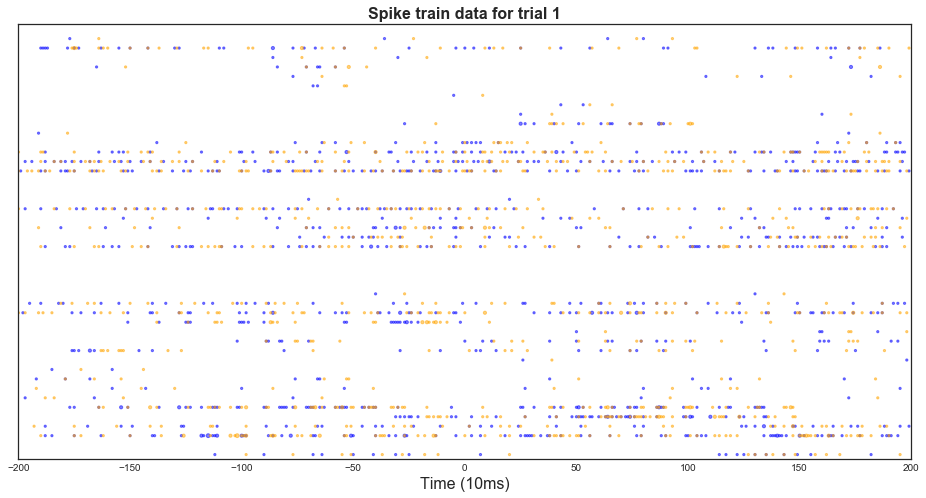

In [16]:
fig = plt.figure(figsize=(16, 8))
for i in range(46):
    plt.scatter(np.arange(400) - 200, np.ones(400) * i,  
                s=spike_data_test_odor[0, i, :] * 50, color='blue', alpha=0.5)
    plt.scatter(np.arange(400) - 200, np.ones(400) * i,  
                s=spike_data_test_poke[0, i, :] * 50, color='orange', alpha=0.5)
plt.xlim(-200, 200)
plt.ylim(0.5, 46.5)
plt.xlabel('Time (10ms)', fontsize=16)
plt.yticks([], [])
plt.title('Spike train data for trial 1', fontsize=16, fontweight='bold')
plt.show()

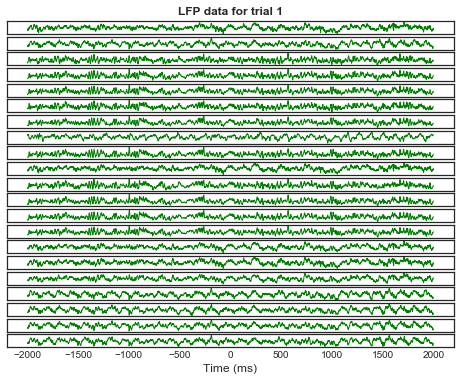

In [18]:
fig = plt.figure(figsize=(8, 6))
for l in range(21):
    plt.subplot(21, 1, l + 1)
    plt.plot(data_odor['eventTimeBins'][:, 0] * 1000, data_odor['lfpEpoch'][0][:, l], linewidth=1, c='green')
    plt.yticks([], [])
    if l < 20:
        plt.xticks([], [])
    if l == 0:
        plt.title('LFP data for trial 1', fontsize=12, fontweight='bold')
#plt.xticks([0, 50, 100, 150, 200, 250], ['0', '50', '100', '150', '200', '250'])
plt.xlabel('Time (ms)', fontsize=12)
plt.show()

In [23]:
np.save('lfp_data_sampled.npy', data_odor['lfpEpoch'][:, 1::10, :])